In [2]:
import numpy
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Normalization, Dense, Dropout, Conv2D, Flatten, MaxPooling2D, Input, Lambda
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import math
from tensorflow.keras import datasets, utils
from sklearn.model_selection import train_test_split
import cv2
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam

In [7]:
local_X_Data = np.load('Datasets/emnist-normal-bymerge.npy')
y = np.load('Datasets/emnist-target-bymerge.npy')

In [3]:
model = Sequential()
# model.add(Input(shape=(28*28,)))
# model.add(norm_layer)
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(47, activation='softmax'))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [4]:
optimizer_Adam = Adam(learning_rate=0.0001)
scc_loss = SparseCategoricalCrossentropy()

In [5]:
model.compile(loss=scc_loss, optimizer=optimizer_Adam, metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='min')
mcp_save = ModelCheckpoint('char_model.keras', save_best_only=True, monitor='val_loss', verbose=1, mode='auto')

In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(local_X_Data,
                    y, 
                    epochs=5, 
                    batch_size=32, 
                    verbose=1, 
                    validation_split=0.1,
                    callbacks=[early_stopping, mcp_save])

In [8]:
labels = pd.read_csv('Datasets/emnist-bymerge-mapping.txt',
                     delimiter=' ', header=None, index_col=0)
labels

,1
0,
0,48
1,49
2,50
3,51
4,52
5,53
6,54
7,55
8,56


In [9]:
labels = labels.squeeze()
labels

0
0      48
1      49
2      50
3      51
4      52
5      53
6      54
7      55
8      56
9      57
10     65
11     66
12     67
13     68
14     69
15     70
16     71
17     72
18     73
19     74
20     75
21     76
22     77
23     78
24     79
25     80
26     81
27     82
28     83
29     84
30     85
31     86
32     87
33     88
34     89
35     90
36     97
37     98
38    100
39    101
40    102
41    103
42    104
43    110
44    113
45    114
46    116
Name: 1, dtype: int64

In [10]:
label_dict = {}

for index, label in enumerate(labels):
    label_dict[index] = chr(label)
    
label_dict

{0: '0',
 1: '1',
 2: '2',
 3: '3',
 4: '4',
 5: '5',
 6: '6',
 7: '7',
 8: '8',
 9: '9',
 10: 'A',
 11: 'B',
 12: 'C',
 13: 'D',
 14: 'E',
 15: 'F',
 16: 'G',
 17: 'H',
 18: 'I',
 19: 'J',
 20: 'K',
 21: 'L',
 22: 'M',
 23: 'N',
 24: 'O',
 25: 'P',
 26: 'Q',
 27: 'R',
 28: 'S',
 29: 'T',
 30: 'U',
 31: 'V',
 32: 'W',
 33: 'X',
 34: 'Y',
 35: 'Z',
 36: 'a',
 37: 'b',
 38: 'd',
 39: 'e',
 40: 'f',
 41: 'g',
 42: 'h',
 43: 'n',
 44: 'q',
 45: 'r',
 46: 't'}

In [11]:
demo = local_X_Data[:10]
demo

array([[[[ 0.        ],
         [ 0.        ],
         [ 0.        ],
         ...,
         [-0.001197  ],
         [-0.001197  ],
         [ 0.        ]],

        [[ 0.        ],
         [-0.00357283],
         [-0.01115283],
         ...,
         [-0.02875895],
         [-0.0077221 ],
         [ 0.        ]],

        [[ 0.        ],
         [-0.01025378],
         [-0.03018486],
         ...,
         [-0.08606118],
         [-0.03004914],
         [-0.00165994]],

        ...,

        [[-0.001197  ],
         [-0.02374899],
         [-0.07051541],
         ...,
         [-0.03973727],
         [-0.01376886],
         [ 0.        ]],

        [[-0.001197  ],
         [-0.00740362],
         [-0.02410608],
         ...,
         [-0.01434075],
         [-0.00729305],
         [ 0.        ]],

        [[ 0.        ],
         [-0.001197  ],
         [-0.001197  ],
         ...,
         [ 0.        ],
         [ 0.        ],
         [ 0.        ]]],


       [[[ 0.        ],


In [12]:
model = load_model('char_model.keras')

In [15]:
y_pred = model.predict(demo)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


array([[6.30675435e-01, 3.26532745e-10, 5.38589802e-07, 6.98680367e-08,
        9.81024950e-09, 1.03087950e-05, 8.80125484e-08, 1.67461458e-08,
        2.62306031e-07, 2.12736936e-07, 6.74638017e-08, 5.60519595e-08,
        5.30537727e-05, 1.74171760e-06, 3.15163762e-09, 2.36678446e-08,
        4.97291580e-07, 1.58706506e-10, 8.08537237e-10, 1.81415842e-07,
        4.71404193e-14, 3.14880144e-09, 1.58373016e-13, 7.76705922e-10,
        3.69244337e-01, 1.08459153e-08, 8.01370049e-07, 4.37127279e-11,
        7.33678974e-07, 1.95363659e-09, 3.33126280e-07, 4.59095872e-10,
        5.76347824e-12, 1.70187730e-13, 1.78169077e-11, 1.77554124e-10,
        5.42894531e-06, 2.54168491e-08, 6.74260832e-07, 4.28483054e-06,
        2.40176448e-08, 4.99465045e-07, 7.13074044e-11, 3.93298061e-09,
        1.17315558e-07, 2.47117988e-08, 1.87946242e-07],
       [2.68915865e-05, 5.41171066e-11, 9.51641414e-06, 4.12456158e-09,
        9.58627879e-06, 6.78588705e-08, 2.19930616e-08, 1.14593453e-10,
       

In [18]:
def predo(arr):
    return np.argmax(arr)

new_y_pred = np.zeros(y_pred.shape[0])

In [19]:
for i in range(y_pred.shape[0]):
    new_y_pred[i] = predo(y_pred[i])
new_y_pred

array([ 0., 39.,  5.,  6., 35.,  6.,  3.,  1., 26.,  6.])

In [24]:
demo.shape

(10, 28, 28, 1)

In [26]:
new_y_pred.shape

(10,)

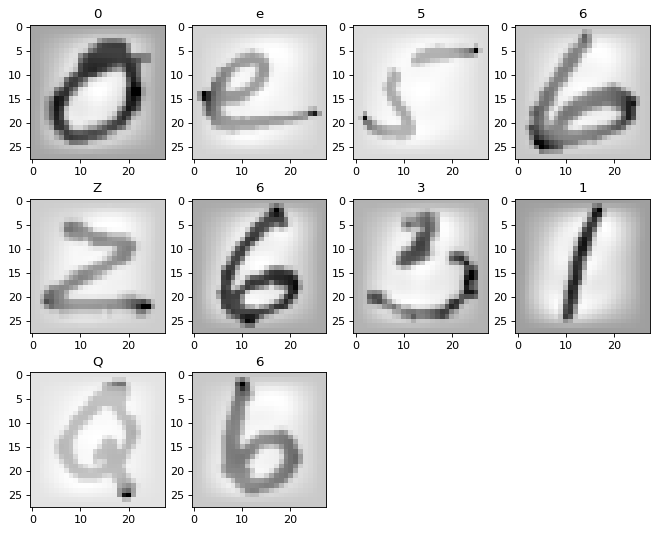

In [32]:
plt.figure(figsize=(10, 8), dpi=80)
for i in range(10):
    plt.subplot(3, 4, i + 1)
    plt.imshow(demo[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.title(label_dict[new_y_pred[i]])